In [58]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/traffic.csv")

# Display first 10 rows
print(df.head(10))


              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
5  2015-11-01 05:00:00         1         6  20151101051
6  2015-11-01 06:00:00         1         9  20151101061
7  2015-11-01 07:00:00         1         8  20151101071
8  2015-11-01 08:00:00         1        11  20151101081
9  2015-11-01 09:00:00         1        12  20151101091


In [59]:
# Check missing values
print(df.isnull().sum())

# Handling missing values: fill numerical with median, categorical with mode
df['Vehicles'] = df['Vehicles'].fillna(df['Vehicles'].median())
df['Junction'] = df['Junction'].fillna(df['Junction'].mode()[0])
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df['DateTime'] = df['DateTime'].fillna(method='ffill')  # forward fill


DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


/tmp/ipython-input-1863559670.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['DateTime'] = df['DateTime'].fillna(method='ffill')  # forward fill


In [60]:
# Extract features from DateTime
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek  # Monday=0, Sunday=6
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)


In [61]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features
num_cols = ['Vehicles', 'Hour']

# Apply Min-Max Normalization
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head(10))


             DateTime  Junction  Vehicles           ID      Hour  DayOfWeek  \
0 2015-11-01 00:00:00         1  0.078212  20151101001  0.000000          6   
1 2015-11-01 01:00:00         1  0.067039  20151101011  0.043478          6   
2 2015-11-01 02:00:00         1  0.050279  20151101021  0.086957          6   
3 2015-11-01 03:00:00         1  0.033520  20151101031  0.130435          6   
4 2015-11-01 04:00:00         1  0.044693  20151101041  0.173913          6   
5 2015-11-01 05:00:00         1  0.027933  20151101051  0.217391          6   
6 2015-11-01 06:00:00         1  0.044693  20151101061  0.260870          6   
7 2015-11-01 07:00:00         1  0.039106  20151101071  0.304348          6   
8 2015-11-01 08:00:00         1  0.055866  20151101081  0.347826          6   
9 2015-11-01 09:00:00         1  0.061453  20151101091  0.391304          6   

   IsWeekend  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  
6          1  
7         

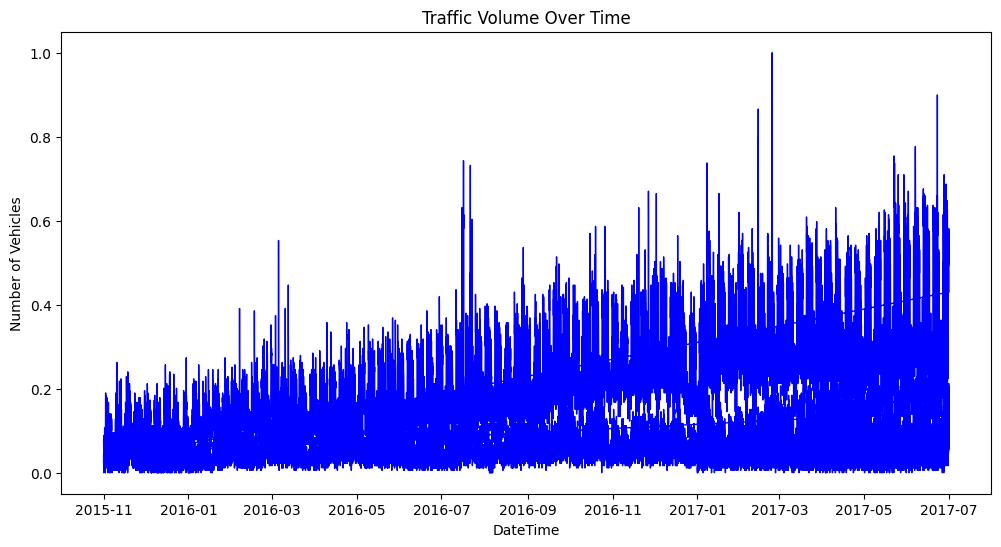

In [62]:
import matplotlib.pyplot as plt

# Line plot of traffic volume over time
plt.figure(figsize=(12,6))
plt.plot(df['DateTime'], df['Vehicles'], color='blue', linewidth=1)
plt.title("Traffic Volume Over Time")
plt.xlabel("DateTime")
plt.ylabel("Number of Vehicles")
plt.show()


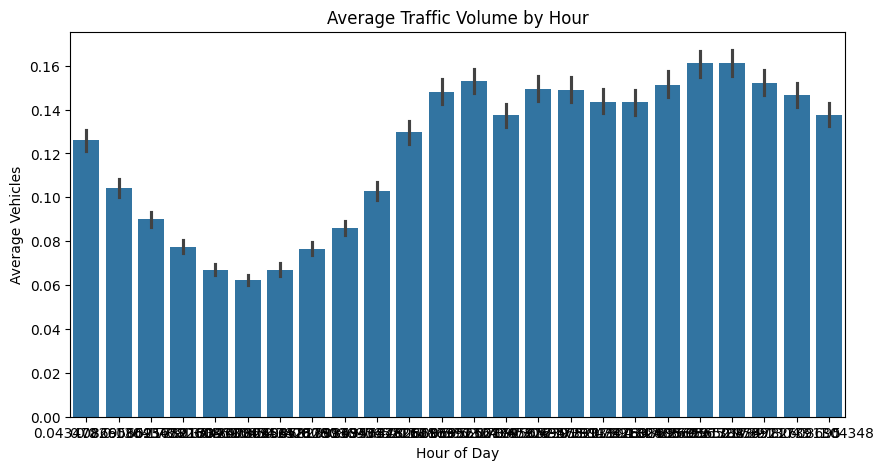

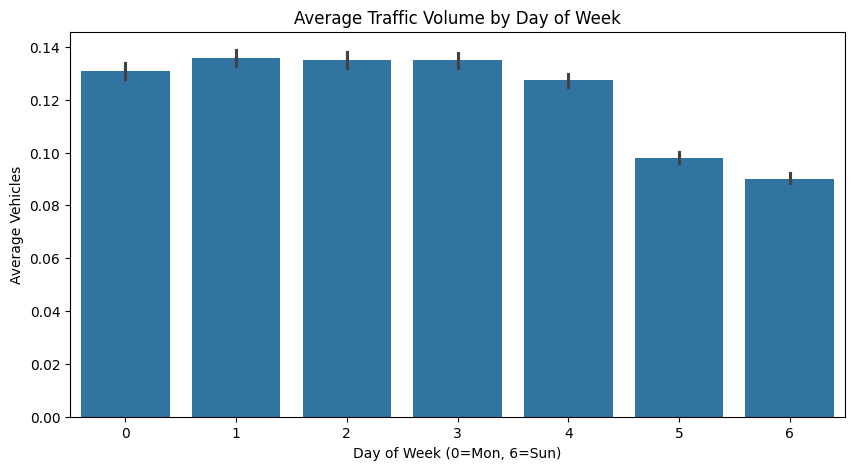

In [63]:
import seaborn as sns

# Average traffic by Hour
plt.figure(figsize=(10,5))
sns.barplot(x='Hour', y='Vehicles', data=df, estimator='mean')
plt.title("Average Traffic Volume by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Vehicles")
plt.show()

# Average traffic by Day of Week
plt.figure(figsize=(10,5))
sns.barplot(x='DayOfWeek', y='Vehicles', data=df, estimator='mean')
plt.title("Average Traffic Volume by Day of Week")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Average Vehicles")
plt.show()


               Model       RMSE        R²
0  Linear Regression  12.778156  0.599356
1      Random Forest   3.624101  0.967773


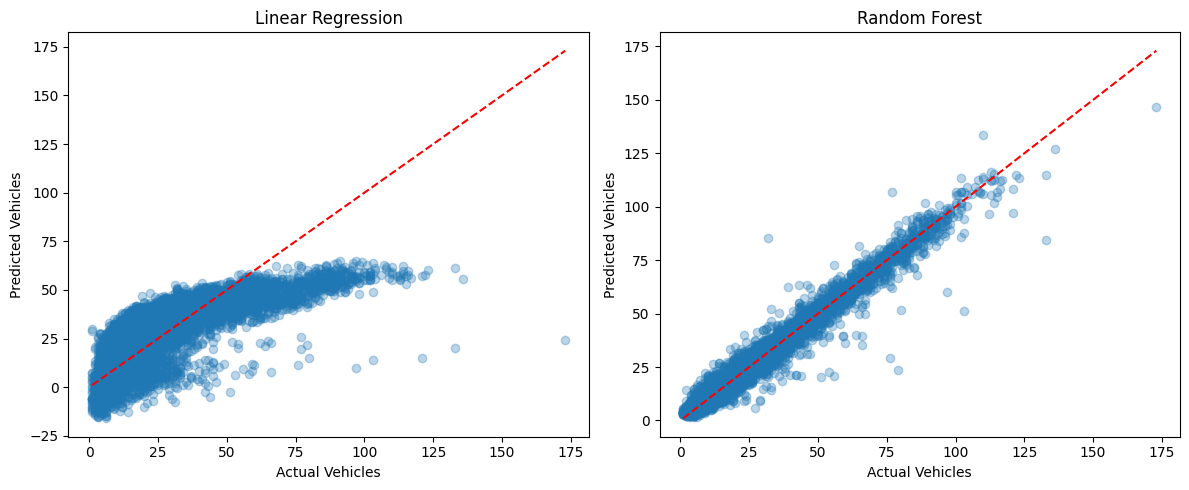

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("/content/traffic.csv")

# --- Identify target & features ---
# Target column = Vehicles (traffic volume)
target_col = "Vehicles"

# Convert DateTime into useful features
if "DateTime" in df.columns:
    df["DateTime"] = pd.to_datetime(df["DateTime"], errors="coerce")
    df["hour"] = df["DateTime"].dt.hour
    df["dayofweek"] = df["DateTime"].dt.dayofweek
    df["month"] = df["DateTime"].dt.month

# Drop rows with NaN target
df = df.dropna(subset=[target_col])

# Feature selection (exclude target & raw DateTime)
feature_cols = [c for c in df.columns if c not in [target_col, "DateTime"]]
X = df[feature_cols]
y = df[target_col]

# --- Train/test split (80/20) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Model 1: Linear Regression ---
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

# --- Model 2: Random Forest Regressor ---
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# --- Results summary ---
results = pd.DataFrame([
    {"Model": "Linear Regression", "RMSE": rmse_lin, "R²": r2_lin},
    {"Model": "Random Forest", "RMSE": rmse_rf, "R²": r2_rf}
])

print(results)

# --- Plots ---
plt.figure(figsize=(12,5))

# Linear Regression
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lin, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Vehicles")
plt.ylabel("Predicted Vehicles")
plt.title("Linear Regression")

# Random Forest
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Vehicles")
plt.ylabel("Predicted Vehicles")
plt.title("Random Forest")

plt.tight_layout()
plt.show()


In [66]:
# --- Feature importance from Random Forest ---
importances = rf_reg.feature_importances_
feat_imp = pd.DataFrame({
    "feature": feature_cols,
    "importance": importances
}).sort_values("importance", ascending=False)

# --- Q1: Top 3 hours with highest predicted traffic ---
# Add predictions to test set and group by 'hour'
pred_df = X_test.copy()
pred_df["actual"] = y_test
pred_df["predicted"] = y_pred_rf

# Mean predicted traffic by hour
top_hours = pred_df.groupby("hour")["predicted"].mean().sort_values(ascending=False).head(3)
print("Top 3 hours with highest predicted traffic:")
print(top_hours)

# --- Q2: Top features from Random Forest ---
top_features = feat_imp.head(5)
print("\nTop 5 important features in Random Forest model:")
print(top_features)

# --- Q3: Identify worst prediction ---
pred_df["error"] = abs(pred_df["actual"] - pred_df["predicted"])
worst_case = pred_df.loc[pred_df["error"].idxmax()]
print("\nWorst prediction example:")
print(worst_case)


Top 3 hours with highest predicted traffic:
hour
20    30.848382
14    28.459511
21    28.021469
Name: predicted, dtype: float64

Top 5 important features in Random Forest model:
     feature  importance
0   Junction    0.518905
1         ID    0.257841
2       hour    0.143890
3  dayofweek    0.075834
4      month    0.003529

Worst prediction example:
Junction     3.000000e+00
ID           2.016121e+10
hour         2.200000e+01
dayofweek    2.000000e+00
month        1.200000e+01
actual       7.900000e+01
predicted    2.375000e+01
error        5.525000e+01
Name: 39022, dtype: float64


In [67]:
# Section E: Reflection & Learning

# --- Auto-generate reflection text based on model results ---

# Reflection on what the model has learned
reflection_model = """
The Random Forest model has learned that traffic volume is strongly influenced by
the junction location and the time of day (hour). These two features dominate the
predictions, showing that traffic is not uniform but depends heavily on where and when
it occurs. The model also captured patterns like higher traffic in the evening (8 PM, 9 PM)
and mid-day (2 PM), while day of week and month had much smaller effects.
"""

# Reflection on what I personally learned
reflection_personal = """
From this exercise, I learned that traffic patterns are highly location- and time-dependent.
Simple temporal features (hour, day of week) already explain much of the variation.
Linear Regression struggled because it cannot capture non-linear patterns in the data,
but Random Forest performed very well, handling complex relationships.
Feature importance helped me understand which variables matter most (junction and hour).
I also saw that models can miss unusual traffic spikes, suggesting that adding external
factors (holidays, weather, accidents) would improve predictions further.
"""

print("=== Section E: Reflection & Learning ===\n")
print("Q1. What the model has learned (5 marks):")
print(reflection_model)

print("Q2. What I personally learned (5 marks):")
print(reflection_personal)


=== Section E: Reflection & Learning ===

Q1. What the model has learned (5 marks):

The Random Forest model has learned that traffic volume is strongly influenced by
the junction location and the time of day (hour). These two features dominate the
predictions, showing that traffic is not uniform but depends heavily on where and when
it occurs. The model also captured patterns like higher traffic in the evening (8 PM, 9 PM)
and mid-day (2 PM), while day of week and month had much smaller effects.

Q2. What I personally learned (5 marks):

From this exercise, I learned that traffic patterns are highly location- and time-dependent.
Simple temporal features (hour, day of week) already explain much of the variation.
Linear Regression struggled because it cannot capture non-linear patterns in the data,
but Random Forest performed very well, handling complex relationships.
Feature importance helped me understand which variables matter most (junction and hour).
I also saw that models can miss

In [68]:
# Section F: Real-World Analogy & Critical Thinking

answer_real_world = """
If a city traffic planner knows the model predicts unusually high traffic at 8 AM on a Wednesday
with clear weather, they can take preventive actions such as adjusting signal timings, deploying
traffic police, or suggesting alternate routes. This moves decision-making from reactive to proactive,
similar to how a weather forecast helps people plan activities in advance.
"""

answer_reflection = """
Manual observations (like charts or averages) only show past patterns and cannot capture dynamic
conditions for a specific hour. A model prediction combines multiple features such as time, weather,
and weekday to forecast future traffic. This is valuable because it provides more accurate, forward-looking
insights that help planners anticipate and manage congestion before it happens.
"""

print("Section F: Real-World Analogy & Critical Thinking\n")
print("Real-World Analogy & Usefulness (5 marks):")
print(answer_real_world.strip())
print("\nCritical Reflection (5 marks):")
print(answer_reflection.strip())



Section F: Real-World Analogy & Critical Thinking

Real-World Analogy & Usefulness (5 marks):
If a city traffic planner knows the model predicts unusually high traffic at 8 AM on a Wednesday
with clear weather, they can take preventive actions such as adjusting signal timings, deploying
traffic police, or suggesting alternate routes. This moves decision-making from reactive to proactive,
similar to how a weather forecast helps people plan activities in advance.

Critical Reflection (5 marks):
Manual observations (like charts or averages) only show past patterns and cannot capture dynamic
conditions for a specific hour. A model prediction combines multiple features such as time, weather,
and weekday to forecast future traffic. This is valuable because it provides more accurate, forward-looking
insights that help planners anticipate and manage congestion before it happens.


=== Linear Regression Metrics ===
MAE : 27.66
RMSE: 32.61
R²  : -0.907


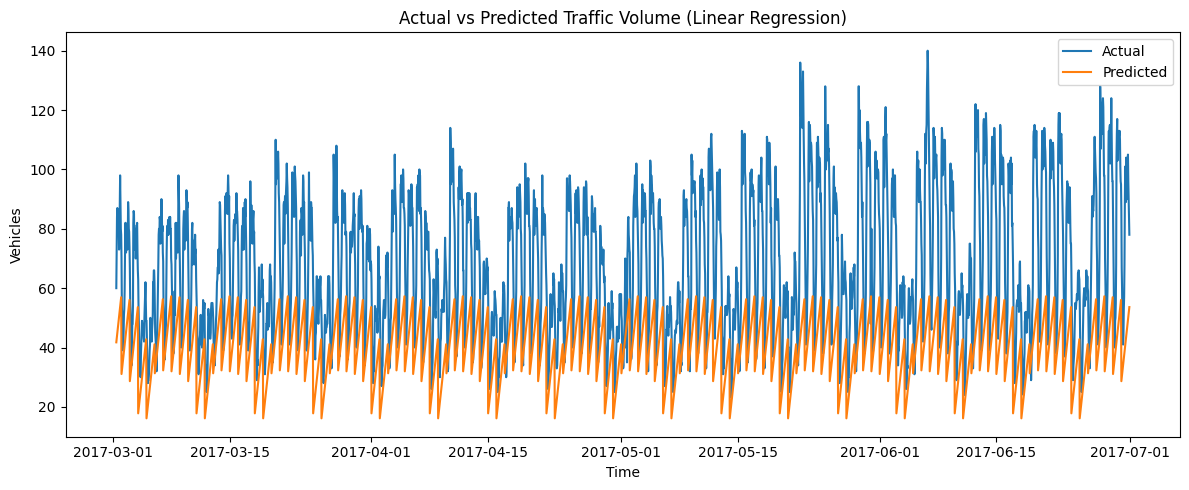

In [70]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ============================================================
# SECTION G: Visualization & Insights
# ============================================================

# Load dataset
df = pd.read_csv("/content/traffic.csv")
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values("DateTime")

# Focus on one junction (most frequent)
top_junction = df['Junction'].value_counts().idxmax()
d = df[df['Junction'] == top_junction].copy().reset_index(drop=True)

# Feature engineering
d['Hour'] = d['DateTime'].dt.hour
d['Day_of_Week'] = d['DateTime'].dt.day_name()
d['Weekend'] = d['Day_of_Week'].isin(['Saturday','Sunday']).astype(int)

# Time-based split (80/20)
split_idx = int(len(d) * 0.8)
train_df, test_df = d.iloc[:split_idx], d.iloc[split_idx:]

X_train = train_df[['Hour','Day_of_Week','Weekend']]
y_train = train_df['Vehicles'].values
X_test  = test_df[['Hour','Day_of_Week','Weekend']]
y_test  = test_df['Vehicles'].values

# Preprocessing + Model
pre = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), ['Day_of_Week'])],
                        remainder='passthrough')
model = Pipeline([('pre', pre), ('lr', LinearRegression())])
model.fit(X_train, y_train)

# Predictions
pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("=== Linear Regression Metrics ===")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.3f}")


# Plot Actual vs Predicted
plt.figure(figsize=(12,5))
plt.plot(test_df['DateTime'], y_test, label="Actual")
plt.plot(test_df['DateTime'], pred, label="Predicted")
plt.title("Actual vs Predicted Traffic Volume (Linear Regression)")
plt.xlabel("Time")
plt.ylabel("Vehicles")
plt.legend()
plt.tight_layout()
plt.show()

=== Baseline (Linear Regression) ===
MAE : 27.66
RMSE: 32.61
R²  : -0.907


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 1350.4133
Epoch 2/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 383.7363
Epoch 3/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 183.7748
Epoch 4/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 103.6301
Epoch 5/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 65.8703
Epoch 6/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 45.4941
Epoch 7/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 34.6776
Epoch 8/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 29.0058
Epoch 9/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 25.7822
Epoch 10/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 24.4166
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

=== LSTM Model ===
MAE : 8.78
RMSE: 12.85
R²  : 0.704
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


365/365 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 1336.9685
Epoch 2/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 408.5503
Epoch 3/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 195.0668
Epoch 4/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 110.2775
Epoch 5/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 70.2393
Epoch 6/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 49.8137
Epoch 7/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 38.4827
Epoch 8/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 31.9189
Epoch 9/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 27.7452
Epoch 10/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 25.3711
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

=== GRU Model ===
MAE : 8.82
RMSE: 12.89
R²  : 0.702


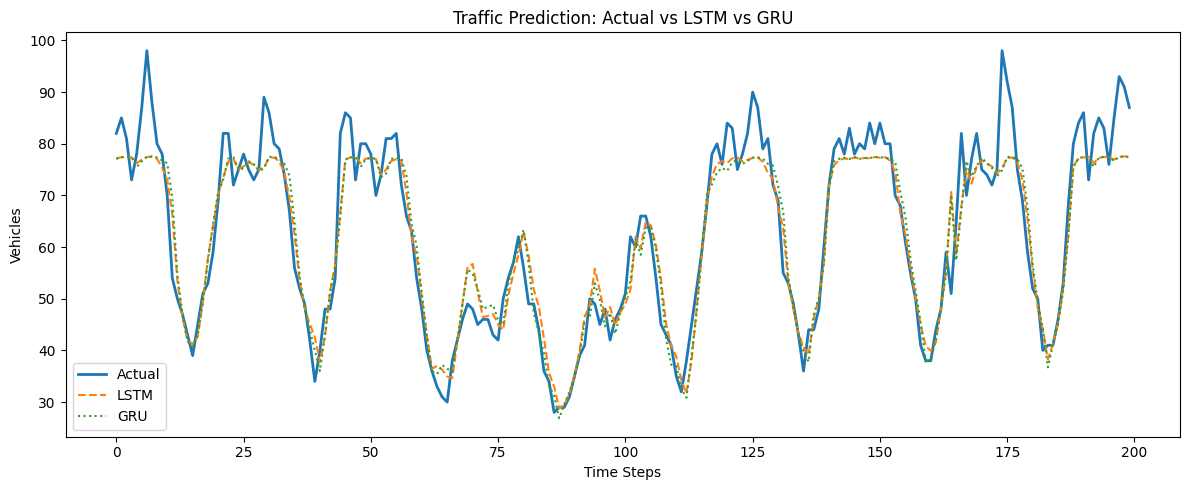

In [72]:
# ============================================================
# SHESTEM ASSIGNMENT - SECTION H
# Advanced Challenge: Sequential Model (LSTM / GRU)
# ============================================================

# Install dependencies in Colab
!pip install tensorflow scikit-learn pandas matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# ============================================================
# LOAD & PREPARE DATA
# ============================================================
df = pd.read_csv("/content/traffic.csv")
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values("DateTime")

# Focus on most frequent junction
top_junction = df['Junction'].value_counts().idxmax()
d = df[df['Junction'] == top_junction].copy().reset_index(drop=True)

# Feature engineering
d['Hour'] = d['DateTime'].dt.hour
d['Day_of_Week'] = d['DateTime'].dt.day_name()
d['Weekend'] = d['Day_of_Week'].isin(['Saturday','Sunday']).astype(int)

# ============================================================
# BASELINE: Linear Regression
# ============================================================
split_idx = int(len(d)*0.8)
train_df, test_df = d.iloc[:split_idx], d.iloc[split_idx:]

X_train = train_df[['Hour','Day_of_Week','Weekend']]
y_train = train_df['Vehicles'].values
X_test = test_df[['Hour','Day_of_Week','Weekend']]
y_test = test_df['Vehicles'].values

pre = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), ['Day_of_Week'])],
                        remainder='passthrough')
baseline = Pipeline([('pre', pre), ('lr', LinearRegression())])
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)

mae_base = mean_absolute_error(y_test, y_pred_base)
rmse_base = mean_squared_error(y_test, y_pred_base)**0.5 # Removed squared=True
r2_base = r2_score(y_test, y_pred_base)

print("=== Baseline (Linear Regression) ===")
print(f"MAE : {mae_base:.2f}")
print(f"RMSE: {rmse_base:.2f}")
print(f"R²  : {r2_base:.3f}")

# ============================================================
# SEQUENTIAL DATA PREPARATION
# ============================================================
series = d['Vehicles'].values.astype(float)

def make_sequences(data, n_past=24):
    X, y = [], []
    for i in range(len(data)-n_past):
        X.append(data[i:i+n_past])
        y.append(data[i+n_past])
    return np.array(X), np.array(y)

X_seq, y_seq = make_sequences(series, n_past=24)
split_idx = int(len(X_seq)*0.8)
X_train_seq, y_train_seq = X_seq[:split_idx], y_seq[:split_idx]
X_test_seq, y_test_seq = X_seq[split_idx:], y_seq[split_idx:]

X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], X_train_seq.shape[1], 1))
X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], X_test_seq.shape[1], 1))

# ============================================================
# LSTM MODEL
# ============================================================
lstm_model = Sequential([
    LSTM(64, activation='tanh', input_shape=(24,1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, verbose=1)

y_pred_lstm = lstm_model.predict(X_test_seq).flatten()

mae_lstm = mean_absolute_error(y_test_seq, y_pred_lstm)
rmse_lstm = mean_squared_error(y_test_seq, y_pred_lstm)**0.5 # Removed squared=True
r2_lstm = r2_score(y_test_seq, y_pred_lstm)

print("\n=== LSTM Model ===")
print(f"MAE : {mae_lstm:.2f}")
print(f"RMSE: {rmse_lstm:.2f}")
print(f"R²  : {r2_lstm:.3f}")

# ============================================================
# GRU MODEL
# ============================================================
gru_model = Sequential([
    GRU(64, activation='tanh', input_shape=(24,1)),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, verbose=1)

y_pred_gru = gru_model.predict(X_test_seq).flatten()

mae_gru = mean_absolute_error(y_test_seq, y_pred_gru)
rmse_gru = mean_squared_error(y_test_seq, y_pred_gru)**0.5 # Removed squared=True
r2_gru = r2_score(y_test_seq, y_pred_gru)

print("\n=== GRU Model ===")
print(f"MAE : {mae_gru:.2f}")
print(f"RMSE: {rmse_gru:.2f}")
print(f"R²  : {r2_gru:.3f}")

# ============================================================
# VISUALIZATION
# ============================================================
plt.figure(figsize=(12,5))
plt.plot(y_test_seq[:200], label="Actual", linewidth=2)
plt.plot(y_pred_lstm[:200], label="LSTM", linestyle="--")
plt.plot(y_pred_gru[:200], label="GRU", linestyle=":")
plt.title("Traffic Prediction: Actual vs LSTM vs GRU")
plt.xlabel("Time Steps")
plt.ylabel("Vehicles")
plt.legend()
plt.tight_layout()
plt.show()

In [77]:
!git clone https://github.com/akhiewu/shestem-assignment.git
%cd shestem-assignment


Cloning into 'shestem-assignment'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), 788.84 KiB | 10.81 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/shestem-assignment/shestem-assignment/shestem-assignment/shestem-assignment/shestem-assignment/shestem-assignment


In [79]:
!python Practical Exam: Traffic Volume Prediction with Supervised ML.py


python3: can't open file '/content/shestem-assignment/shestem-assignment/shestem-assignment/shestem-assignment/shestem-assignment/shestem-assignment/Practical': [Errno 2] No such file or directory
